In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

(704, 1279, 3)


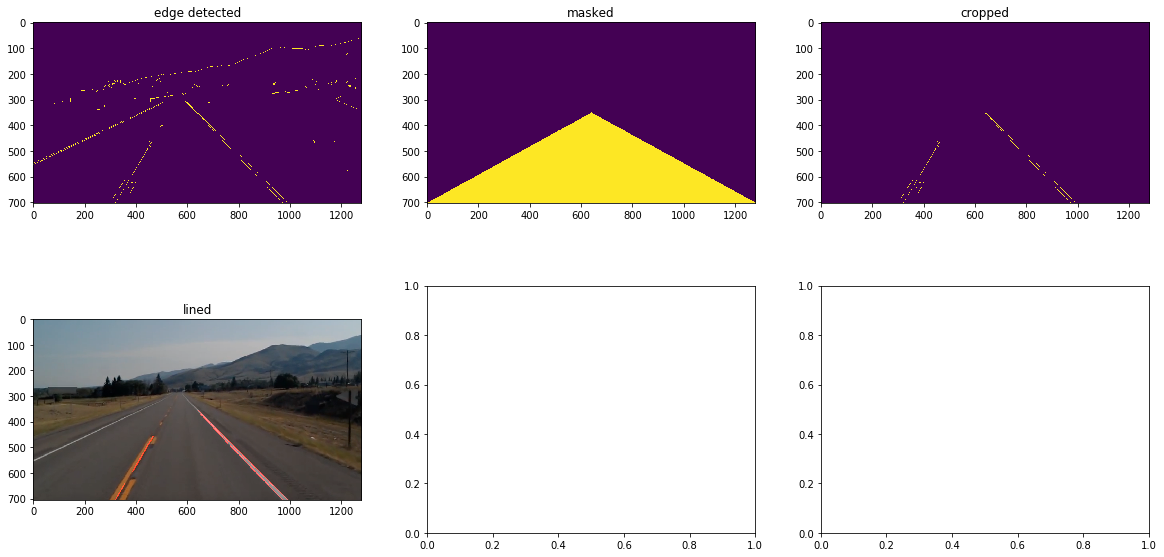

In [34]:
def reOI(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = shape[2]
    match_mask_color = (255,) 
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image, mask

def drawLines(img, lines):
    img2 = img.copy()
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (255, 0, 0), 3)
            
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

fig, axs = plt.subplots(2, 3, figsize = (20, 10))

road = cv2.imread('C:\\Users\\80SM01YGIH\\Anish\\CV101\\road.png', -1)
road = cv2.cvtColor(road, cv2.COLOR_BGR2RGB)

shape = road.shape
height = shape[0]
width = shape[1]
print(shape)

ROI = [(0, height), 
        (width/2, height/2),
        (width, height)]

gray_image = cv2.cvtColor(road, cv2.COLOR_RGB2GRAY)

canny_image = cv2.Canny(gray_image, 100, 200)

cropped_image, mask = reOI(canny_image, np.array([ROI], np.int32))

lines = cv2.HoughLinesP(cropped_image, 6, np.pi/60, 160, np.array([]), minLineLength = 40, maxLineGap = 25)

image_with_lines = drawLines(road, lines)

axs[0][0].imshow(canny_image)
axs[0][0].set_title('edge detected')
axs[0][1].imshow(mask)
axs[0][1].set_title('masked')
axs[0][2].imshow(cropped_image)
axs[0][2].set_title('cropped')
axs[1][0].imshow(image_with_lines)
axs[1][0].set_title('lined')
plt.show()